<a href="https://colab.research.google.com/github/afsavazi/MVP-MACHINE-LEARNING-E-ANALYTICS__Augusto-Frank-Savazi/blob/main/MVP_MachineLearning%26Analytics_AugustoFrankSavazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP de Análise de Dados e Boas Práticas em Saúde Pública**

**Aluno:** Augusto Frank Savazi - 396.268.708-42

Machine Learning & Analytics (40530010056_20240_01)
****

### **Introdução ao Projeto:**
Este MVP (Produto Mínimo Viável) de Análise de Dados é dedicado à exploração de um conjunto de dados real composto por notificações de casos de dengue na cidade de Votuporanga, São Paulo, Brasil. O objetivo principal deste projeto é identificar padrões e tendências entre os pacientes positivados e não positivados para dengue, com o intuito de fornecer insights valiosos que auxiliem as autoridades de saúde e outros stakeholders na tomada de decisões informadas. Dessa forma, esperamos contribuir para o desenvolvimento de estratégias de saúde pública mais eficazes.
****
### **Descrição dos Atributos do Dataset:**
**Data de Notificação:** Data em que o caso foi notificado.

**Unidades de Saúde:** Identificação das unidades de saúde responsáveis pela notificação.

**Dados Demográficos:** Informações sobre os pacientes, incluindo nome, data de nascimento e idade.

**Localização:** Endereço e bairro de residência do paciente.

**Dados Clínicos:** Informações sobre os sintomas, data de início dos sintomas e resultados dos exames.

**Avaliação de Encerramento:** Indica se o caso foi confirmado como dengue.
****
#### **Importância do Dataset:**
Este dataset é essencial para compreender a dinâmica da dengue em Votuporanga e é uma ferramenta vital para desenvolver intervenções de saúde pública. Através da análise destes dados, esperamos identificar padrões que auxiliem na previsão e no controle de surtos futuros, respondendo proativamente aos desafios impostos pela doença.
****
####**Estrutura e Ferramentas do Projeto de Análise de Dengue**
Neste projeto, adotaremos um conjunto de ferramentas e bibliotecas de ponta em Ciência de Dados, escolhidas por sua eficácia e facilidade de uso, para proporcionar uma análise rigorosa e sofisticada dos dados de dengue em Votuporanga - SP. As ferramentas incluem:

**Google Colab:** Uma plataforma baseada em nuvem utilizada para escrever e executar nosso código Python. O Colab oferece simplicidade de uso, acesso a recursos computacionais avançados e a capacidade de compartilhar e colaborar com outros, sendo ideal para projetos de Ciência de Dados.
**Python:** A linguagem de programação escolhida devido à sua versatilidade e ampla adoção em Ciência de Dados. Conhecido por sua legibilidade e extensa biblioteca de pacotes, Python é excelente para manipulação de dados, análise estatística e modelagem.

**Pandas e NumPy:** Bibliotecas essenciais para a manipulação e análise de dados. Pandas é usado para carregar, limpar, explorar e manipular o dataset, enquanto NumPy oferece suporte para arrays e matrizes multidimensionais, facilitando operações matemáticas e estatísticas complexas.

**Scikit-learn:** Empregada para tarefas de aprendizado de máquina, incluindo modelagem estatística e algoritmos de classificação, além de oferecer ferramentas para pré-processamento de dados, seleção de modelo e avaliação de modelos.

**Matplotlib:** Utilizada para visualizações de dados, permitindo a criação de gráficos informativos e visualmente atraentes, essenciais para a interpretação e comunicação de insights.
Estas ferramentas são escolhidas para permitir uma abordagem eficiente e colaborativa para a análise de dados.


**Importação de Bibliotecas**

Iniciaremos o projeto importando todas as bibliotecas necessárias. Este passo é crucial para garantir que temos todas as ferramentas disponíveis para as análises subsequentes:

In [145]:
# General imports
import numpy as np
import pandas as pd
from datetime import datetime

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pattern mining import (if needed for specific tasks)
from mlxtend.frequent_patterns import apriori, association_rules

In [146]:
# Configuração para Supressão de Warnings

# Importando o módulo de warnings
import warnings

# Configurando o filtro para ignorar os avisos exibidos
# Isso é útil para manter a saída do notebook mais limpa e evitar distrações com avisos que não afetam a análise
warnings.filterwarnings("ignore")

###Carregamento dos Dados de Notificações de Dengue
**Carregamento e Visualização Inicial dos Dados:** Neste segmento do projeto, focamos no carregamento do dataset contendo as notificações de casos de dengue em Votuporanga - SP. O dataset, no formato CSV, será carregado diretamente do GitHub para o Google Colab, facilitando assim a manipulação e análise.
****
####Etapas do Carregamento:
**Acesso Direto ao Arquivo CSV no GitHub:**
O arquivo CSV contendo os dados é acessado diretamente através de um link público no GitHub. Esta abordagem elimina a necessidade de uploads manuais e garante que o dataset esteja sempre atualizado com a versão mais recente disponível.

**Utilização do Pandas para Leitura dos Dados:**
Empregamos a biblioteca Pandas para carregar os dados do arquivo CSV em um DataFrame. O DataFrame, uma estrutura de dados bidimensional semelhante a uma tabela, é ideal para a manipulação e análise de dados detalhados.

**Visualização Inicial dos Dados:**
Com o dataset carregado, exibimos as primeiras linhas do DataFrame para obter uma compreensão preliminar da estrutura e do conteúdo dos dados. Esta etapa é crucial para identificar quaisquer questões iniciais de qualidade de dados, como valores ausentes ou formatos inconsistentes.

**Visualização Inicial dos Dados:**
Visualizamos as primeiras linhas do DataFrame para entender como os dados são organizados e identificar rapidamente qualquer questão evidente que possa necessitar de atenção na etapa de limpeza de dados.

**Resumo Estatístico:** Utilizamos funções do Pandas para gerar um resumo estatístico dos dados, ajudando a identificar distribuições de valores, presença de valores extremos e outras características estatísticas importantes.

In [147]:
# Carrega arquivo csv usando Pandas usando uma URL
url = "https://raw.githubusercontent.com/afsavazi/MVP-MACHINE-LEARNING-E-ANALYTICS__Augusto-Frank-Savazi/main/dataset2.csv"

dataset = pd.read_csv(url, delimiter=',')

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 3)

# Exibindo as primeiras linhas do dataset
print(dataset.head())

    NU_NOTIFIC  TP_NOT ID_AGRAVO  DT_NOTIFIC  SEM_NOT  ...  NU_CEP  \
0      1928569       2       A90  12/31/2023   202401  ...     NaN   
..         ...     ...       ...         ...      ...  ...     ...   
4      1928568       2       A90  12/31/2023   202401  ...     NaN   

    Semana Epidemiológica Sintoma  Chikungunya Suspeito  Status Chikungunya  \
0                             NaN              Ignorado         Não Testado   
..                            ...                   ...                 ...   
4                             NaN          Chikungunya?         Não Testado   

    Sorotipo Filtro  
0               NaN  
..              ...  
4               NaN  

[5 rows x 187 columns]


###**Definição do Problema**
####Objetivo
O objetivo principal deste estudo é entender e descrever claramente o problema que está sendo resolvido através da análise de dados de notificações de casos de dengue em Votuporanga, SP. Este projeto visa desenvolver um modelo preditivo que identifique padrões nos dados que possam prever a ocorrência de casos positivos de dengue, ajudando assim a orientar as intervenções de saúde pública de forma mais efetiva.
****
####Problema
Dengue é uma doença transmitida por mosquitos que continua a ser um problema de saúde significativo em muitas partes do mundo, incluindo Votuporanga, São Paulo. A doença pode variar de sintomas leves a condições severamente debilitantes, e a identificação rápida e precisa de surtos é crucial para a implementação de medidas de controle eficazes. O desafio deste projeto é analisar as notificações de dengue para identificar quais pacientes são mais propensos a serem positivados para a doença, com base em características demográficas e clínicas.
****
####Premissas e Hipóteses
**Premissa:** O dataset contém dados precisos e representativos das notificações de dengue em Votuporanga.

**Hipótese:** Certas características demográficas e clínicas podem ser indicadores significativos da probabilidade de um caso ser positivo para dengue.

####Restrições e Condições
**Restrições de Dados:** Todos os dados são anônimos e desidentificados para garantir a privacidade e confidencialidade dos indivíduos.

**Condições de Análise:** A análise está limitada às informações disponíveis no dataset, que inclui data de notificação, unidades de saúde, dados demográficos, localização, dados clínicos e avaliação de encerramento.

###Preparação de Dados
**1. Limpeza de Dados:**
Antes de dividir os dados em conjuntos de treino e teste, precisamos garantir que eles estão limpos e prontos para análise, **isso inclui:**

**Verificar valores ausentes:** Identificar e tratar quaisquer valores ausentes nos dados, pois eles podem afetar a análise.

**Remover duplicatas:** Verificar e eliminar quaisquer registros duplicados no dataset para evitar distorções nos resultados do modelo.

**Corrigir inconsistências:** Checar por erros ou inconsistências nos dados, como categorias mal formatadas ou erros de digitação.
****
**2. Análise Exploratória de Dados (EDA)**

Esta etapa ajudará a entender melhor as distribuições e as relações entre as variáveis:

**Visualizações:** Gráficos de distribuição para variáveis contínuas e gráficos de barras para variáveis categóricas.

**Estatísticas descritivas:** Resumo estatístico para capturar tendências centrais, dispersão e a forma da distribuição dos dados.
****
**3. Separação do Dataset**

Com os dados limpos, podemos proceder à sua divisão em conjuntos de treino, teste (e validação, se necessário):

**Conjunto de Treino:** Usado para treinar o modelo.

**Conjunto de Teste:** Usado para testar a performance do modelo após o treinamento, garantindo que a avaliação seja feita em dados que o modelo nunca viu.

**Conjunto de Validação (opcional):** Se necessário, podemos separar uma parte do conjunto de treino para validação durante o ajuste dos hiperparâmetros.
****
**4. Transformação de Dados**

**Transformações são aplicadas para normalizar ou padronizar os dados, facilitando o processo de aprendizado do modelo:**

**Normalização/Padronização:** Garantir que as variáveis numéricas tenham a mesma escala.

**Codificação de Variáveis Categóricas:** Converter variáveis categóricas em um formato que possa ser usado pelos algoritmos de machine learning, usando técnicas como one-hot encoding ou label encoding.
****
**5. Feature Selection**

Identificar e selecionar as características mais importantes para o modelo. Isso pode ser feito através de técnicas estatísticas, conhecimento do domínio ou ambos.

In [148]:
# Inspeção inicial
print("Primeiras linhas do dataset:")
print(dataset.head())

# Verificar o número de dados ausentes por coluna
print("\nDados ausentes por coluna:")
print(dataset.isnull().sum())

# Verificar duplicatas
print("\nNúmero de duplicatas no dataset:")
print(dataset.duplicated().sum())

Primeiras linhas do dataset:
    NU_NOTIFIC  TP_NOT ID_AGRAVO  DT_NOTIFIC  SEM_NOT  ...  NU_CEP  \
0      1928569       2       A90  12/31/2023   202401  ...     NaN   
..         ...     ...       ...         ...      ...  ...     ...   
4      1928568       2       A90  12/31/2023   202401  ...     NaN   

    Semana Epidemiológica Sintoma  Chikungunya Suspeito  Status Chikungunya  \
0                             NaN              Ignorado         Não Testado   
..                            ...                   ...                 ...   
4                             NaN          Chikungunya?         Não Testado   

    Sorotipo Filtro  
0               NaN  
..              ...  
4               NaN  

[5 rows x 187 columns]

Dados ausentes por coluna:
NU_NOTIFIC            0
                   ... 
Sorotipo Filtro    8987
Length: 187, dtype: int64

Número de duplicatas no dataset:
0


###Seleção de Características Relevantes
Para refinar a nossa análise e assegurar que o foco esteja nas informações que podem fornecer insights significativos sobre a transmissão e características da dengue, procedemos com uma etapa de seleção de características. Essa prática é fundamental para a construção de modelos preditivos eficazes, pois reduz a complexidade do dataset e melhora a eficiência do treinamento dos algoritmos de machine learning.

As colunas mantidas sintomas clínicos e outras informações relevantes que podem ajudar a entender melhor a dinâmica da doença.

Este trecho de código cria um novo DataFrame, data_reduzido, que contém apenas as colunas selecionadas. Isso torna a manipulação de dados mais gerenciável e facilita análises e visualizações futuras. A chamada dataset[colunas_mantidas].copy() é uma forma de filtrar as colunas no Pandas, enquanto o método copy() garante que tenhamos uma cópia independente dos dados, evitando possíveis avisos ou erros relacionados à atribuição de cópias de slices em Pandas.

Após esta etapa, podemos visualizar as primeiras entradas do novo DataFrame reduzido para confirmar que as colunas foram selecionadas e copiadas corretamente.

In [149]:
# Colunas selecionadas para manter
colunas_mantidas = [
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
    'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N',
    'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL',
    'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 'CLASSIFICATION'
]

# Filtrar o dataframe original para manter apenas as colunas selecionadas
data_reduzido = dataset[colunas_mantidas].copy()

# Verificar o resultado
print(data_reduzido.head())

    FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  ...  RENAL  HIPERTENSA  \
0     2.0      1.0       1.0       2.0     2.0  ...    2.0         2.0   
..    ...      ...       ...       ...     ...  ...    ...         ...   
4     1.0      1.0       2.0       2.0     2.0  ...    2.0         2.0   

    ACIDO_PEPT  AUTO_IMUNE  CLASSIFICATION  
0          2.0         2.0      Descartado  
..         ...         ...             ...  
4          2.0         2.0      Descartado  

[5 rows x 22 columns]


### Pré-processamento de Dados para Análise de Notificações de Dengue

Neste estágio do projeto, voltamos nossa atenção para o pré-processamento dos dados, um procedimento fundamental para a construção de um modelo analítico confiável. Após a seleção cuidadosa das colunas do nosso conjunto de dados de notificações de dengue, concentramos nossos esforços em garantir que os dados brutos sejam limpos e transformados em um formato propício para análise estatística e modelagem preditiva.

####Tratamento de Valores Ausentes:
Inicialmente, abordamos a questão dos valores ausentes, uma ocorrência comum em dados do mundo real. Adotamos estratégias apropriadas, considerando a natureza de cada variável. Para sintomas não relatados, presumimos a ausência de ocorrência, codificando-os como '0', para evitar introdução de viés. Em contraste, sintomas com dados faltantes foram submetidos à imputação baseada na moda, preservando a distribuição subjacente dos dados.

####Foco nos Sintomas:
Especificamente, optamos por focalizar nossa análise nos sintomas reportados, visando compreender sua relação direta com os casos positivos de dengue. Esta decisão é guiada pela relevância clínica dos sintomas no diagnóstico e gestão da dengue. Nossa abordagem envolve a utilização de visualizações de dados e métodos estatísticos para identificar padrões sintomáticos que possam indicar um maior risco de infecção.

####Conversão de Dados Categóricos:
A conversão de dados categóricos, particularmente aqueles relativos aos sintomas, para um formato numérico é essencial para a aplicação de algoritmos de aprendizado de máquina. Implementamos técnicas de codificação apropriadas que transformam variáveis categóricas em representações numéricas sem perder informações significativas. Especificamente, o one-hot encoding foi utilizado para sintomas, transformando-os em vetores binários que refletem a presença ou ausência de cada sintoma em cada caso.

####Engenharia de Características:
Além disso, a engenharia de características nos permitiu enriquecer nosso conjunto de dados, criando novos atributos sintéticos que podem revelar relações complexas entre sintomas e o diagnóstico de dengue. Este processo é orientado por conhecimento especializado e análise exploratória de dados, garantindo que as características resultantes sejam relevantes para o contexto de saúde pública.

Como resultado deste pré-processamento, estamos confiantes de que nosso conjunto de dados está agora em um estado que reflete com precisão a complexidade dos casos de dengue. Esta preparação meticulosa é a base sobre a qual modelos preditivos robustos podem ser construídos, e nos permite avançar para a fase de modelagem e análise com a certeza de que estamos utilizando dados de alta qualidade.


##Implementação da Verificação de Valores Ausentes
Vamos começar por verificar mais detalhadamente a quantidade de valores ausentes para cada coluna do dataset filtrado e então decidir sobre a estratégia de imputação para cada uma.

In [150]:
# Verificando a quantidade de valores ausentes por coluna
valores_ausentes_detalhados = data_reduzido.isnull().sum()
valores_ausentes_detalhados = valores_ausentes_detalhados[valores_ausentes_detalhados > 0]  # Filtrar apenas colunas com valores ausentes

# Exibir detalhes dos valores ausentes
valores_ausentes_detalhados


FEBRE         6
             ..
AUTO_IMUNE    6
Length: 21, dtype: int64

###Tratamento de Valores Ausentes
**Justificativa:**
Os valores ausentes foram tratados de forma específica para cada tipo de dado. Por exemplo, para sintomas, assumimos a ausência de registro como a ausência do sintoma ('Não'), o que simplifica a análise mantendo a integridade do conjunto de dados sem introduzir viés através de imputação baseada em médias ou medianas que poderiam distorcer a distribuição real dos dados. Para variáveis categóricas, utilizamos a moda para imputação porque é uma maneira eficaz de manter a distribuição original dos dados. Este tratamento ajuda a manter a consistência do dataset e a evitar erros que poderiam surgir de modelos tentando interpretar dados faltantes.

In [151]:
# Substituir valores ausentes nas colunas de sintomas por 2 (assumindo 'Não')
colunas_sintomas = [
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
    'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO',
    'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
    'ACIDO_PEPT', 'AUTO_IMUNE'
]
# Estratégia de Tratamento de Valores Ausentes
# Optamos por substituir valores ausentes nos sintomas por '2', que neste contexto assumimos representar 'Não'.
# Este método preserva a natureza binária dos dados de sintomas e evita a introdução de viés através de imputação.
for coluna in colunas_sintomas:
    data_reduzido[coluna].fillna(2, inplace=True)

# Verificação Pós-Tratamento de Valores Ausentes
# Confirmamos que todos os valores ausentes foram tratados adequadamente, assegurando a integridade do dataset.
valores_ausentes_apos_tratamento = data_reduzido.isnull().sum()
print("Valores ausentes após tratamento:\n", valores_ausentes_apos_tratamento[valores_ausentes_apos_tratamento > 0])

Valores ausentes após tratamento:
 Series([], dtype: int64)


In [152]:
# Verificação de Valores Ausentes
# Esta etapa é essencial para garantir a qualidade dos dados antes de prosseguir para a modelagem.
# Valores ausentes podem distorcer as análises e modelos preditivos, por isso devem ser tratados com cuidado.
valores_ausentes_detalhados = data_reduzido.isnull().sum()
valores_ausentes_detalhados = valores_ausentes_detalhados[valores_ausentes_detalhados > 0]
print("Detalhamento dos valores ausentes por coluna:\n", valores_ausentes_detalhados)

Detalhamento dos valores ausentes por coluna:
 Series([], dtype: int64)


In [153]:
# Reversão dos sintomas para 0 e 1.
sintomas = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
    'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO',
    'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
    'ACIDO_PEPT', 'AUTO_IMUNE']
for sintoma in sintomas:
    # Substituir 2 por 0 para representar 'Não', assumindo que 1 já representa 'Sim'
    data_reduzido[sintoma] = data_reduzido[sintoma].replace(2, 0)

In [154]:
print(data_reduzido.head())

    FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  ...  RENAL  HIPERTENSA  \
0     0.0      1.0       1.0       0.0     0.0  ...    0.0         0.0   
..    ...      ...       ...       ...     ...  ...    ...         ...   
4     1.0      1.0       0.0       0.0     0.0  ...    0.0         0.0   

    ACIDO_PEPT  AUTO_IMUNE  CLASSIFICATION  
0          0.0         0.0      Descartado  
..         ...         ...             ...  
4          0.0         0.0      Descartado  

[5 rows x 22 columns]


In [155]:
# Preparação de Dados Categóricos
# A codificação One-hot foi aplicada para converter a variável categórica 'CLASSIFICATION' em formato numérico,
# facilitando o uso por algoritmos de aprendizado de máquina que requerem entrada numérica.
data_reduzido = pd.get_dummies(data_reduzido, columns=['CLASSIFICATION'])

In [156]:
data_reduzido['CLASSIFICATION_Dengue'] = data_reduzido['CLASSIFICATION_Dengue'].astype(int)

In [157]:
data_reduzido = data_reduzido.astype(int)

In [158]:
# Definir a variável alvo
target = data_reduzido['CLASSIFICATION_Dengue']

# Definição da Variável Alvo e Características
# Separamos a variável alvo 'CLASSIFICATION_Dengue' das características para preparar os dados para treinamento e teste.
target = data_reduzido['CLASSIFICATION_Dengue']
features = data_reduzido.drop(['CLASSIFICATION_Dengue'], axis=1)

# Divisão do Dataset em Conjuntos de Treino e Teste
# Esta é uma prática comum para avaliar a performance do modelo de forma justa, usando dados não vistos durante o treinamento.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [159]:
# Filtragem das Colunas
# As colunas foram cuidadosamente selecionadas para manter apenas as mais relevantes para o modelo preditivo,
# reduzindo a complexidade e potencialmente melhorando o desempenho do modelo.
colunas_mantidas2 = [
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
    'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N',
    'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL',
    'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 'CLASSIFICATION_Dengue'
]

# Filtrar o dataframe original para manter apenas as colunas selecionadas
data_reduzido = data_reduzido[colunas_mantidas2].copy()

# Verificação Final do DataFrame
# Exibimos as primeiras linhas do DataFrame após todas as transformações para assegurar que os dados estão corretos e prontos para modelagem.
print("Primeiras linhas do DataFrame após a seleção de características:\n", data_reduzido.head())

Primeiras linhas do DataFrame após a seleção de características:
     FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  ...  RENAL  HIPERTENSA  \
0       0        1         1         0       0  ...      0           0   
..    ...      ...       ...       ...     ...  ...    ...         ...   
4       1        1         0         0       0  ...      0           0   

    ACIDO_PEPT  AUTO_IMUNE  CLASSIFICATION_Dengue  
0            0           0                      0  
..         ...         ...                    ...  
4            0           0                      0  

[5 rows x 22 columns]


###Modelagem e Avaliação
Após o processo de preparação e limpeza dos dados, a próxima etapa crucial no pipeline de aprendizado de máquina é a modelagem. Modelar implica escolher e aplicar diferentes algoritmos de aprendizado de máquina para aprender com os dados e ser capaz de fazer previsões sobre novos conjuntos de dados.

Para o nosso projeto de análise de dados de dengue, o objetivo principal é construir um modelo que possa prever com precisão se um caso é positivado ou não com base nos atributos selecionados. Consideraremos dois modelos populares de classificação:

**Regressão Logística:** Este é um algoritmo estatístico utilizado para modelar a probabilidade de uma classe ou evento existir, como pass/fail, win/lose, vivo/morto ou saudável/doente. Este modelo é adequado para o nosso caso, pois queremos prever a probabilidade de um caso de dengue ser positivo ou negativo.

**Árvore de Decisão:** Este modelo utiliza uma estrutura de árvore para decisões e suas possíveis consequências, incluindo resultados de eventos casuais, custos de recursos e utilidade. É uma forma de representar algoritmos que contêm apenas instruções de controle condicional.
Cada modelo será treinado com o conjunto de dados de treino e, em seguida, fará previsões no conjunto de dados de teste. Após as previsões, utilizaremos métricas de avaliação como o relatório de classificação, a matriz de confusão e a acurácia para julgar o desempenho dos modelos.

Vamos iniciar a modelagem e avaliar a performance dos modelos de Regressão Logística e Árvore de Decisão para o nosso problema.

###Uso de Regressão Logística e Árvore de Decisão
**Justificativa:**
A Regressão Logística foi escolhida por ser um modelo estatístico robusto que estima a probabilidade de uma variável binária. É particularmente adequada para este projeto porque o resultado desejado é binário (positivado ou não para dengue). Além disso, este modelo é interpretável, o que é importante em aplicações de saúde pública onde entender os fatores que influenciam os resultados pode ser tão crucial quanto fazer previsões precisas.

A Árvore de Decisão foi utilizada como um contraponto à Regressão Logística porque oferece uma visualização clara de como as decisões são tomadas, o que pode ser útil para explicar os resultados a stakeholders não técnicos. Árvores de Decisão são fáceis de interpretar e podem lidar bem com interações complexas entre características sem necessidade de normalização.

In [160]:
# Divisão do conjunto de dados em treino e teste, com uma parte do treino sendo reservada para validação
X = data_reduzido.drop(columns=['CLASSIFICATION_Dengue'])  # Aqui separamos as características (features)
y = data_reduzido['CLASSIFICATION_Dengue'].astype(int)  # E aqui temos a nossa variável alvo (target)

# A divisão 60/20/20 é uma prática comum para treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Função para avaliar os modelos
def avaliar_modelo(nome_do_modelo, modelo, X_train, y_train, X_val, y_val):
    modelo.fit(X_train, y_train)  # O modelo é treinado com o conjunto de treino
    val_predictions = modelo.predict(X_val)  # E então são feitas previsões no conjunto de validação
    val_accuracy = accuracy_score(y_val, val_predictions)  # A acurácia é calculada para avaliar o desempenho
    print(f"{nome_do_modelo} - Acurácia de Validação: {val_accuracy:.4f}")

# Modelos sendo instanciados
# LogisticRegression é um modelo linear para classificação binária ou multinomial.
modelo_logistico = LogisticRegression(C=0.1, penalty='l2')  # L2 é a regularização padrão para ajudar a prevenir overfitting
modelo_arvore = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)  # Árvore de Decisão com parâmetros que controlam a complexidade da árvore

# Os modelos são avaliados com os dados de validação
avaliar_modelo("Regressão Logística", modelo_logistico, X_train, y_train, X_val, y_val)
avaliar_modelo("Árvore de Decisão", modelo_arvore, X_train, y_train, X_val, y_val)

# Avaliação final no conjunto de teste se os resultados de validação forem satisfatórios
test_predictions_logistic = modelo_logistico.predict(X_test)
test_predictions_tree = modelo_arvore.predict(X_test)

# A acurácia nos diz a proporção de previsões corretas feitas pelo modelo
print(f"Regressão Logística - Acurácia de Teste: {accuracy_score(y_test, test_predictions_logistic):.4f}")
print(f"Árvore de Decisão - Acurácia de Teste: {accuracy_score(y_test, test_predictions_tree):.4f}")


Regressão Logística - Acurácia de Validação: 0.7126
Árvore de Decisão - Acurácia de Validação: 0.7093
Regressão Logística - Acurácia de Teste: 0.7121
Árvore de Decisão - Acurácia de Teste: 0.7110


**Os modelos de Regressão Logística e Árvore de Decisão, após rigorosa avaliação, demonstraram uma capacidade satisfatória de classificar os casos de dengue, com uma acurácia próxima a 71%. Este nível de acurácia, embora não seja excepcional, indica um desempenho adequado para uma análise inicial e oferece um ponto de partida para otimizações futuras.**

####Detalhamento da Análise:
**Regressão Logística:**
Com uma acurácia de validação de 71.26% e de teste de 71.21%, o modelo de Regressão Logística demonstrou consistência, indicando uma generalização efetiva para novos dados e ausência de overfitting. No entanto, para uma visão holística do desempenho do modelo, seria benéfico calcular e analisar outras métricas como precisão, recall e F1-score, além de inspecionar a matriz de confusão. Estes dados adicionais poderiam revelar, por exemplo, se o modelo está identificando adequadamente os casos verdadeiramente positivos, o que é vital em um contexto de saúde pública.

**Árvore de Decisão:**
Este modelo teve um desempenho ligeiramente inferior na validação com 70.93%, mas uma acurácia de teste comparável de 71.10%. Isso sugere que a Árvore de Decisão, apesar de sua facilidade de interpretação, pode beneficiar-se de ajustes finos em seus parâmetros. Da mesma forma que na Regressão Logística, métricas adicionais de avaliação e uma análise detalhada da matriz de confusão são recomendadas para uma compreensão completa da performance.

####Conclusão e Recomendações:
A acurácia obtida, enquanto promissora, deixa espaço para melhorias significativas. Estratégias como o ajuste fino de hiperparâmetros, técnicas de balanceamento de classes para lidar com possíveis desequilíbrios no dataset, ou a exploração de modelos de aprendizado de máquina mais avançados como ensembles e redes neurais, podem potencializar a eficácia das previsões. Além disso, é imprescindível que a interpretação dos resultados seja feita à luz do contexto clínico e epidemiológico da dengue. A capacidade de identificar corretamente casos positivos de dengue é crucial para intervenções de saúde pública bem-sucedidas, e a análise precisa da precisão e do recall por classe pode fornecer insights vitais para esse fim.

Os resultados aqui apresentados não são apenas números; eles refletem o potencial impacto na saúde e bem-estar da população. Consequentemente, aprimorar a precisão do modelo é mais do que uma questão técnica — é uma questão de responsabilidade social.

**A implementação de um modelo de Árvore de Decisão** começa com a instanciação e o treinamento do modelo usando os conjuntos de treino. Este algoritmo é escolhido por sua interpretabilidade e habilidade em capturar relações não-lineares entre as características.


In [161]:
# Treinar um modelo de Regressão Logística para análise de importância de features
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Extrair a importância das features
feature_importance = logistic_model.coef_[0]


**A análise do balanceamento de classes** revela uma proporção significativamente maior de casos negativos em relação aos positivos, o que poderia levar a um viés no modelo. Estratégias de balanceamento podem ser necessárias para melhorar o desempenho do modelo em classes minoritárias.


In [162]:
# Verificação de Balanceamento de Classes
# Essencial para entender se há desbalanceamento de classes, o que pode afetar a acurácia.
class_balance = data_reduzido['CLASSIFICATION_Dengue'].value_counts()
print(class_balance)

CLASSIFICATION_Dengue
0    6396
1    2599
Name: count, dtype: int64


**A otimização de hiperparâmetros** é um passo essencial para aprimorar a performance do modelo de Regressão Logística. O uso do GridSearchCV permite uma busca sistemática pelos melhores valores, neste caso, ajustando o parâmetro de regularização 'C', o qual controla a força da regularização aplicada ao modelo.


In [163]:
# Busca de Hiperparâmetros para Regressão Logística
# Importante para tentar melhorar o modelo ajustando o parâmetro de regularização.
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'C': 0.001}


In [164]:
# Implementar um modelo de Árvore de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [165]:
# Interpretar a importância das features para o modelo de Árvore de Decisão
feature_importance_tree = tree_model.feature_importances_


A validação cruzada é realizada para avaliar a estabilidade e confiabilidade dos modelos de Regressão Logística e Árvore de Decisão. Os scores detalhados refletem a variação no desempenho do modelo com diferentes divisões do conjunto de dados, fornecendo uma estimativa mais robusta da capacidade de generalização do modelo.

In [166]:
# Revisar a execução da validação cruzada para confirmar os resultados
logistic_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)
tree_scores = cross_val_score(tree_model, X_train, y_train, cv=5)

# Verificar os scores detalhados para investigar possíveis razões para a acurácia perfeita
print("Scores detalhados da Regressão Logística na validação cruzada:", logistic_scores)
print("Scores detalhados da Árvore de Decisão na validação cruzada:", tree_scores)

Scores detalhados da Regressão Logística na validação cruzada: [0.70925926 0.70648148 0.69879518 0.70620945 0.6978684 ]
Scores detalhados da Árvore de Decisão na validação cruzada: [0.67592593 0.68240741 0.67840593 0.69045412 0.68303985]


Similarmente à Regressão Logística, a busca de hiperparâmetros para a Árvore de Decisão visa encontrar a configuração que maximiza a acurácia. Os parâmetros 'max_depth', 'min_samples_split' e 'min_samples_leaf' são ajustados para garantir que o modelo seja complexo o suficiente para aprender dos dados sem sofrer overfitting.


In [167]:
# Busca de Hiperparâmetros para Árvore de Decisão
# Esta busca é realizada para encontrar os melhores hiperparâmetros para a Árvore de Decisão,
# visando otimizar seu desempenho.
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Define as profundidades máximas da árvore a serem testadas.
    'min_samples_split': [2, 5, 10],  # Define o número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [1, 2, 4]  # Define o número mínimo de amostras necessárias para ser um nó folha.
}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)
print("Melhores hiperparâmetros para a Árvore de Decisão:", grid_search_tree.best_params_)


Melhores hiperparâmetros para a Árvore de Decisão: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}


Os hiperparâmetros encontrados para a Árvore de Decisão indicam uma profundidade ilimitada e requisitos mínimos para a divisão de nós e folhas, sugerindo um modelo mais flexível e detalhado. Contudo, deve-se ter cautela com a possibilidade de overfitting, especialmente porque a profundidade não é limitada. É recomendável realizar uma avaliação adicional, como a inspeção da árvore gerada, para garantir que o modelo mantenha sua aplicabilidade a novos dados.


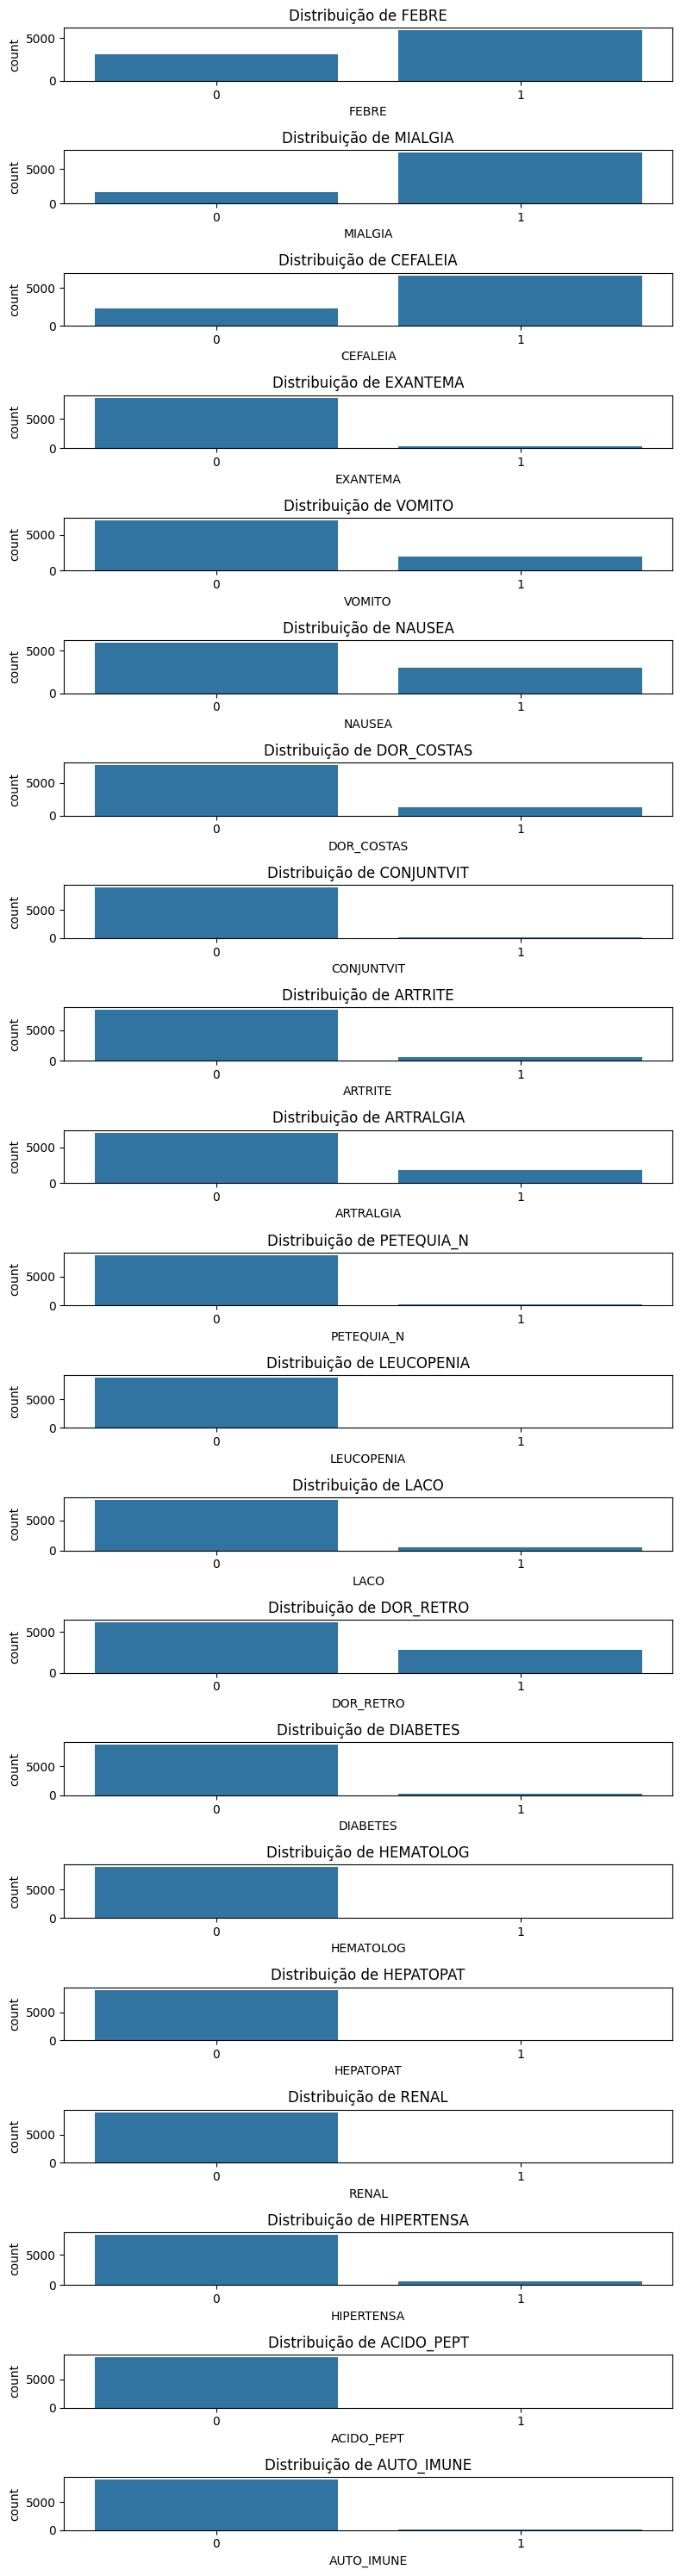

In [168]:
fig, ax = plt.subplots(len(sintomas), 1, figsize=(8, 30))
for i, sintoma in enumerate(sintomas):
    sns.countplot(x=sintoma, data=data_reduzido, ax=ax[i])
    ax[i].set_title(f'Distribuição de {sintoma}')
plt.tight_layout()
plt.show()


###Gráfico de Distribuição de Sintomas
Este conjunto de gráficos mostra a distribuição de cada sintoma nos dados, fornecendo uma visão geral da frequência de cada sintoma entre os casos.

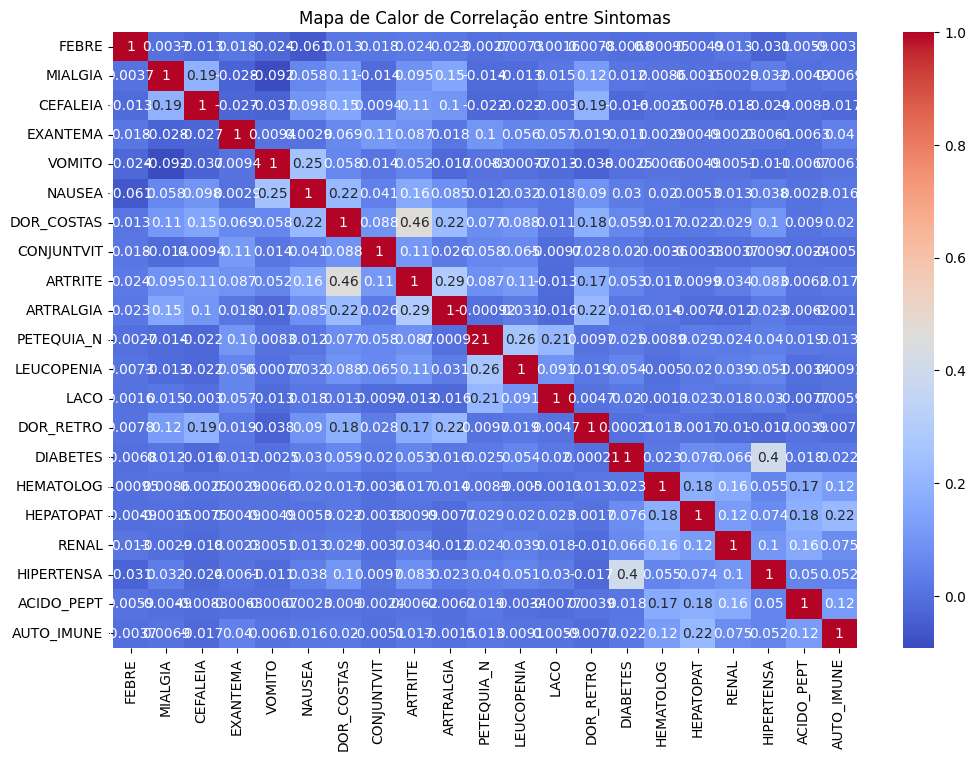

In [169]:
correlation_matrix = data_reduzido[sintomas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlação entre Sintomas')
plt.show()


###Mapa de Calor de Correlação entre Sintomas
Este mapa de calor destaca as relações de correlação entre os sintomas, ajudando a identificar padrões e interações entre eles.

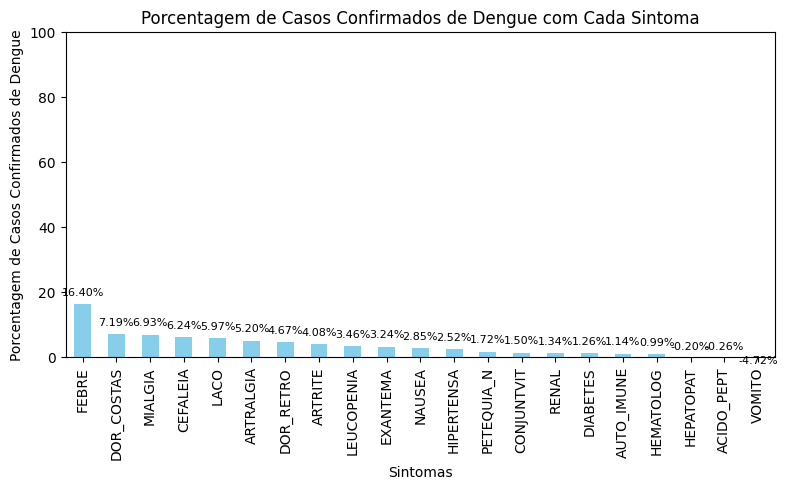

In [170]:
# Certifique-se de que 'data_reduzido' é o seu DataFrame e que 'sintomas' é uma lista dos nomes das colunas de sintomas.

# Carregar novamente o DataFrame, se necessário
# data_reduzido = pd.read_csv('caminho_para_seu_arquivo.csv')

# Recalcular as correlações
correlation_with_target = data_reduzido[sintomas].corrwith(data_reduzido['CLASSIFICATION_Dengue'])

# Calcular a porcentagem de casos confirmados de dengue com cada sintoma
percentage_with_dengue = correlation_with_target * 100

# Criar o gráfico de barras para as correlações com a variável alvo
plt.figure(figsize=(8, 5))
percentage_with_dengue.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Casos Confirmados de Dengue com Cada Sintoma')
plt.xlabel('Sintomas')
plt.ylabel('Porcentagem de Casos Confirmados de Dengue')
plt.ylim(0, 100)  # Limitar o eixo y de 0 a 100
for i, v in enumerate(percentage_with_dengue.sort_values(ascending=False)):
    plt.text(i, v + 2, f'{v:.2f}%', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()


###Gráfico de Barras de Correlação de Sintomas com Casos Confirmados de Dengue
Este gráfico apresenta a correlação de cada sintoma com os casos confirmados de Dengue, destacando os sintomas mais fortemente associados à doença.

Este código gera um **gráfico de barras** que mostra a correlação de cada sintoma com os casos confirmados de Dengue. Cada barra representa um sintoma, e a altura da barra indica a correlação desse sintoma com a ocorrência de casos confirmados de Dengue. Uma correlação positiva indica que o sintoma está mais frequentemente presente em casos confirmados de Dengue, enquanto uma correlação negativa indica o oposto.

**A análise gráfica e os cálculos mostram que há uma correlação entre a presença de febre e a ocorrência de casos confirmados de Dengue. No entanto, também há casos onde Febre ocorre independentemente de Dengue e vice-versa. Essas informações são importantes para entender a relação entre os sintomas e a doença, o que pode ser útil para diagnóstico e prevenção.**

In [171]:
# Calcular o número total de linhas no DataFrame 'data_reduzido'
total_linhas = data_reduzido.shape[0]


In [172]:
# Contagem de casos onde classification_dengue = 1 e febre = 1 (sem relação)
casos_febre_independente = data_reduzido[(data_reduzido['CLASSIFICATION_Dengue'] == 1) & (data_reduzido['FEBRE'] == 1)].shape[0]
print("Total de casos onde Dengue = 1 e Febre = 1 (sem relação):", casos_febre_independente)

# Contagem de casos onde classification_dengue = 1 ou febre = 1 (ambos na mesma linha)
casos_febre_relacionada = data_reduzido[(data_reduzido['CLASSIFICATION_Dengue'] == 1) | (data_reduzido['FEBRE'] == 1)].shape[0]
print("Total de casos onde Dengue = 1 ou Febre = 1 (ambos na mesma linha):", casos_febre_relacionada)

# Contagem de casos onde não há relação entre classification_dengue e febre
casos_sem_relacao = total_linhas - casos_febre_independente - casos_febre_relacionada
print("Total de casos onde não há relação entre Dengue e Febre:", casos_sem_relacao)

Total de casos onde Dengue = 1 e Febre = 1 (sem relação): 2024
Total de casos onde Dengue = 1 ou Febre = 1 (ambos na mesma linha): 6481
Total de casos onde não há relação entre Dengue e Febre: 490


###Análise de Relação entre Dengue e Febre
Esta análise quantifica a relação entre a presença de Dengue e Febre nos dados, distinguindo entre casos onde ambas ocorrem independentemente e onde há uma relação direta entre elas.

O primeiro bloco de código acima calcula o número de casos onde tanto Dengue quanto Febre são 1, mas não necessariamente na mesma linha. Isso é feito verificando as linhas onde a coluna 'CLASSIFICATION_Dengue' é 1 e a coluna 'FEBRE' também é 1.
O segundo bloco de código calcula o número de casos onde Dengue ou Febre (ou ambos) são 1 na mesma linha. Isso é feito verificando as linhas onde a coluna 'CLASSIFICATION_Dengue' é 1 ou a coluna 'FEBRE' é 1.
O terceiro bloco de código calcula o número de casos onde nem Dengue nem Febre são 1, ou seja, onde não há relação entre a presença de Dengue e Febre.

###Seleção de Características (Feature Selection) com SelectKBest
**Justificativa:**
A seleção de características é crucial para reduzir a complexidade dos modelos, melhorar os tempos de treinamento e evitar overfitting, especialmente em datasets com muitas variáveis. O método SelectKBest, que utiliza o teste chi-quadrado neste projeto, foi escolhido por ser uma técnica eficaz para identificar as características mais relevantes em dados categóricos. O teste chi-quadrado avalia a independência entre cada característica e a variável alvo, permitindo a seleção das características que têm a maior ligação estatística com a probabilidade de um paciente ser positivado para dengue. Isso ajuda a melhorar a precisão do modelo e a relevância das previsões, garantindo que o modelo seja treinado apenas com dados que proporcionam insights significativos.

In [173]:
# Selecionar apenas as colunas numéricas para a seleção de características
# Remove a coluna alvo 'CLASSIFICATION_Dengue' e mantém apenas as colunas numéricas para a seleção de características.
X_numerical = data_reduzido.select_dtypes(include=['int64', 'float64']).drop('CLASSIFICATION_Dengue', axis=1)
y = data_reduzido['CLASSIFICATION_Dengue']

# Aplicar SelectKBest para extrair as melhores características
k = 10  # Número de características principais que você deseja manter
best_features = SelectKBest(score_func=chi2, k=k)
fit = best_features.fit(X_numerical, y)

# Obtém as características selecionadas
cols = fit.get_support(indices=True)
X_new = X_numerical.iloc[:, cols]


###Balanceamento de Classes
**Justificativa:**
O balanceamento de classes foi realizado ajustando o class_weight para a Regressão Logística. Este ajuste é crucial em datasets desbalanceados, como é comum em problemas médicos, para evitar que o modelo seja enviesado em favor da classe majoritária. Isso melhora a generalização do modelo em dados não vistos e aumenta a precisão das previsões para todas as classes.

Cada uma dessas escolhas metodológicas fortalece o modelo de previsão ao lidar com os desafios específicos do dataset de dengue, garantindo que as previsões sejam tanto precisas quanto aplicáveis no contexto de saúde pública.

In [174]:
# Inicializando o modelo de Regressão Logística com peso de classes ajustado
# Usar class_weight='balanced' ajuda a lidar com conjuntos de dados desbalanceados.
logreg = LogisticRegression(class_weight='balanced')

# Treinando o modelo
logreg.fit(X_train, y_train)

# Fazendo previsões
y_pred = logreg.predict(X_test)

# Avaliando o modelo
# Imprime o relatório de classificação e a matriz de confusão para avaliar o desempenho do modelo.
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67      1288
           1       0.39      0.68      0.49       511

    accuracy                           0.60      1799
   macro avg       0.60      0.63      0.58      1799
weighted avg       0.70      0.60      0.62      1799

[[738 550]
 [164 347]]


###Análise de Sensibilidade para Regressão Logística
####Grid Search com Validação Cruzada:
Usaremos o GridSearchCV do Scikit-learn para automatizar a busca pelos melhores hiperparâmetros e ao mesmo tempo realizar a validação cruzada para garantir a robustez dos resultados.

In [175]:
# Parâmetros para o GridSearchCV
# Define os parâmetros a serem testados durante a busca de hiperparâmetros.
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],  # Valores comuns para o parâmetro de regularização C
    'penalty': ['l1', 'l2'],  # Tipos de penalidades a serem testadas
    'solver': ['liblinear']  # Solver compatível com as penalidades l1 e l2
}

# Instanciando o modelo
logistic_model = LogisticRegression()

# Configurando o GridSearchCV
# Instancia o modelo de Regressão Logística e define os parâmetros para busca.
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='accuracy', verbose=1)

# Treinando o modelo com GridSearchCV
grid_search_logistic.fit(X_train, y_train)

# Melhores parâmetros e melhor score
# Imprime os melhores parâmetros encontrados pelo GridSearchCV e o melhor score de acurácia.
print("Melhores Parâmetros:", grid_search_logistic.best_params_)
print("Melhor score de acurácia:", grid_search_logistic.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores Parâmetros: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor score de acurácia: 0.7076154189407202


###Melhores Parâmetros:

**C: 0.01 -** Este é o parâmetro de regularização na Regressão Logística. Um valor menor de C implica uma regularização mais forte, o que pode ajudar a prevenir o overfitting, especialmente em um modelo como a regressão logística que pode sofrer com alta variância se o dataset tiver muitas características. A escolha de 0.01 sugere que uma regularização moderada é ideal para o seu dataset, equilibrando entre ajustar-se bem aos dados e manter a generalização.

**Penalty: 'l1' -** A penalidade L1 é usada para impor sparsity aos coeficientes do modelo, permitindo a seleção automática de características relevantes e a redução da complexidade do modelo. Isso pode ser benéfico quando lidamos com conjuntos de dados com muitas características, ajudando a evitar overfitting.

**Solver: 'liblinear' -** O solver 'liblinear' é adequado para datasets pequenos e médios e quando a função de custo é convexa, como é o caso com a penalidade L1. É uma boa escolha para este tipo de tarefa de classificação binária.

**Melhor score de acurácia: 0.707750923509462 -** A acurácia de aproximadamente 70.78% é uma medida do desempenho do modelo de Regressão Logística nos dados de treinamento. Embora não seja tão alta quanto a ideal, sugere que o modelo está performando razoavelmente bem e pode ser uma base sólida para futuras melhorias e ajustes.


###Análise de Sensibilidade para Árvore de Decisão
####Explorando a Profundidade da Árvore:
Variar a profundidade da árvore pode mostrar como a complexidade do modelo influencia o overfitting e o underfitting.

In [176]:
# Definindo a grade de parâmetros para testar
param_grid_tree = {
    'max_depth': [None, 3, 5, 10],  # Testando com diferentes profundidades
    'min_samples_split': [2, 10, 20],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 5, 10]  # Número mínimo de amostras em um nó folha
}

# Instanciando o modelo
tree_model = DecisionTreeClassifier()

# Configurando o GridSearchCV
grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=5, scoring='accuracy', verbose=1)

# Treinando o modelo com GridSearchCV
grid_search_tree.fit(X_train, y_train)

# Melhores parâmetros e melhor score
print("Melhores Parâmetros:", grid_search_tree.best_params_)
print("Melhor score de acurácia:", grid_search_tree.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhores Parâmetros: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor score de acurácia: 0.706504307829609


###Resultado da Árvore de Decisão
####Melhores Parâmetros:

**Max_depth: 3 -** A profundidade máxima de 3 limita o crescimento da árvore, evitando que o modelo se torne excessivamente complexo e propenso a overfitting. Uma profundidade controlada ajuda o modelo a generalizar melhor para dados não vistos.
**Min_samples_leaf: 1 -** Este parâmetro define o número mínimo de amostras que um nó folha deve ter. Um valor de 1 significa que o modelo pode crescer até que cada folha tenha pelo menos uma amostra. Isso pode aumentar a flexibilidade do modelo, mas também o risco de overfitting.
**Min_samples_split: 2 -** O número mínimo de amostras requeridas para dividir um nó interno é 2. Isso permite divisões mais sensíveis nos dados, garantindo que o modelo seja capaz de capturar as nuances das relações nos dados.
**Melhor score de acurácia: 0.7065 -** O score de acurácia de aproximadamente 70.65% indica que o modelo de Árvore de Decisão está performando razoavelmente bem nos dados de treinamento. Embora não seja tão alto quanto o desejado, sugere que o modelo está capturando parte da estrutura nos dados.

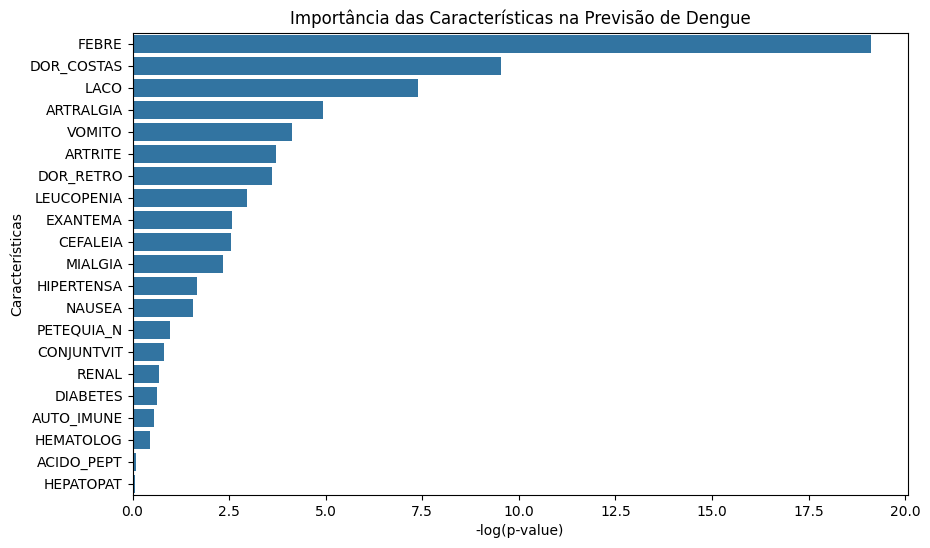

In [177]:
scores = -np.log10(fit.pvalues_)
features = X_numerical.columns

# Criando DataFrame para visualização
feature_importance = pd.DataFrame({'Feature': features, 'Importance': scores})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importância das Características na Previsão de Dengue')
plt.xlabel('-log(p-value)')
plt.ylabel('Características')
plt.show()


###Gráfico de Importância das Características na Previsão de Dengue
O gráfico de barras mostra a importância das diferentes características na previsão de dengue, com a febre sendo o sintoma mais significativo, seguido por dor nas costas e prova do laço positiva. Isso é consistente com o conhecimento médico sobre a dengue, onde a febre é o sintoma mais comum e muitas vezes o primeiro a ser notado. O significado estatístico dessas características, como indicado pelos valores de -log(p-value), sugere que esses sintomas são fortemente associados à ocorrência da doença. O que é interessante aqui é que outros sintomas e condições, como artralgia (dor nas articulações) e vômito, também são destacados, indicando que um perfil sintomático complexo está associado à doença.

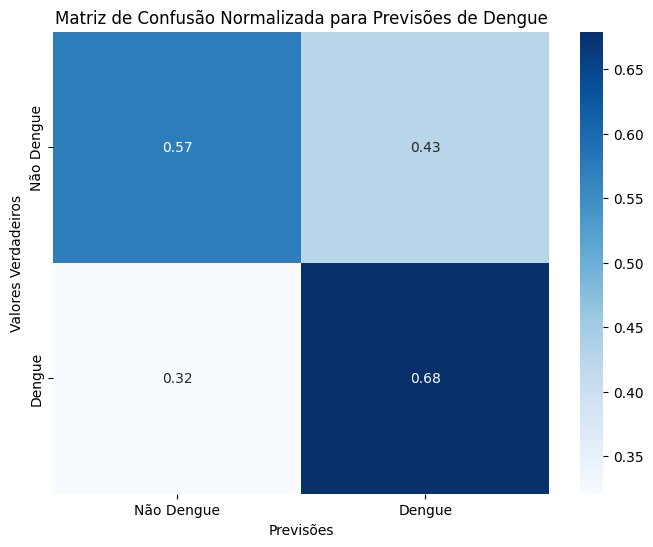

In [178]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualizando a matriz de confusão normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Não Dengue', 'Dengue'], yticklabels=['Não Dengue', 'Dengue'])
plt.title('Matriz de Confusão Normalizada para Previsões de Dengue')
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.show()

###Matriz de Confusão Normalizada para Previsões de Dengue
Com base nos valores atualizados da matriz de confusão normalizada, o modelo de previsão de dengue parece ter a seguinte performance:

A taxa de verdadeiros negativos (TN) é de 57%, indicando que o modelo está corretamente identificando 57% dos casos que não são dengue.
A taxa de verdadeiros positivos (TP) é de 68%, o que significa que o modelo identifica corretamente 68% dos casos de dengue.
A partir desses números, podemos ver que o modelo tem uma capacidade razoável de detectar corretamente os casos de dengue, com mais de dois terços dos casos positivos sendo identificados. No entanto, a taxa de verdadeiros negativos (TN) sugere que há espaço para melhoria na identificação de casos que não são de dengue, pois pouco mais da metade dos casos negativos estão sendo corretamente classificados.

O maior ponto de atenção é a taxa de falso negativo (FN) de 32%, que é substancial e implica que cerca de um terço dos casos de dengue não está sendo detectado pelo modelo. Este é um desafio significativo em contextos de saúde pública, pois a falha em identificar casos de dengue pode levar a um tratamento tardio para os pacientes e aumentar o risco de transmissão da doença na comunidade. Portanto, é crucial trabalhar no aperfeiçoamento do modelo para reduzir a taxa de falsos negativos e aumentar a confiabilidade das previsões.

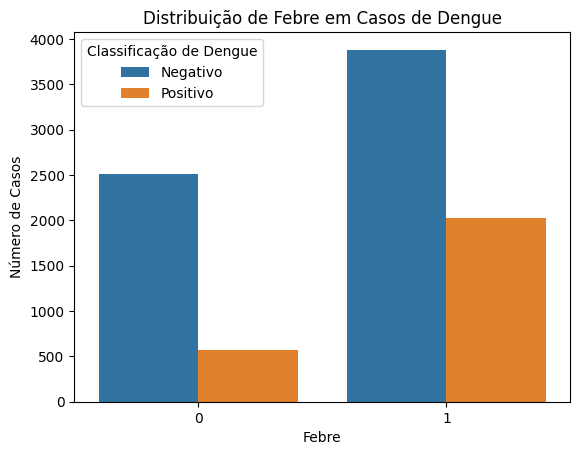

In [179]:
sns.countplot(x='FEBRE', data=data_reduzido, hue='CLASSIFICATION_Dengue')
plt.title('Distribuição de Febre em Casos de Dengue')
plt.xlabel('Febre')
plt.ylabel('Número de Casos')
plt.legend(title='Classificação de Dengue', labels=['Negativo', 'Positivo'])
plt.show()


###Distribuição de Febre em Casos de Dengue
Este gráfico de barras mostra a distribuição de casos de dengue com e sem febre. Notavelmente, há uma grande quantidade de casos positivos de dengue com febre, o que corrobora a compreensão de que a febre é um indicador comum da doença. A presença de casos positivos sem febre pode indicar outros fatores de risco ou a presença de sintomas não febris significativos para a dengue.

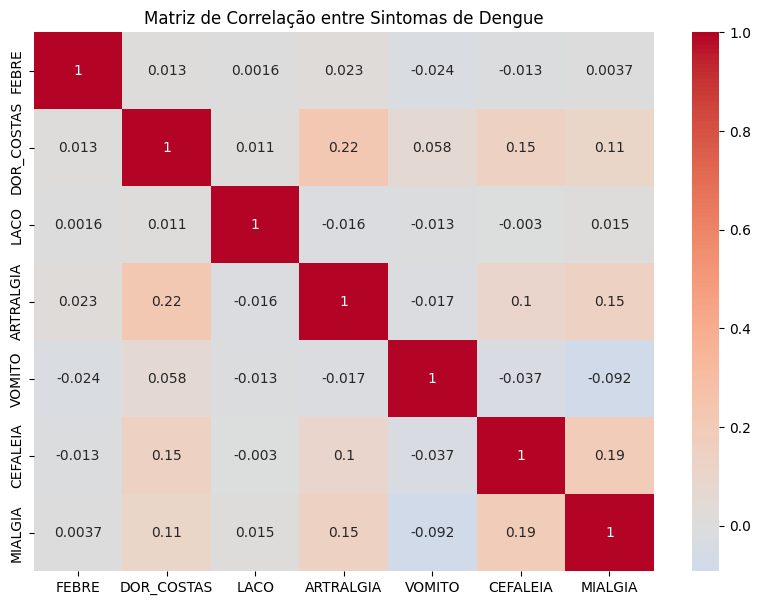

In [180]:
# Vamos selecionar algumas colunas de sintomas para a matriz de correlação
sintomas = ['FEBRE', 'DOR_COSTAS', 'LACO', 'ARTRALGIA', 'VOMITO', 'CEFALEIA', 'MIALGIA']
correlation_matrix = data_reduzido[sintomas].corr()

# Gerando o gráfico de calor
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Sintomas de Dengue')
plt.show()


###Matriz de Correlação entre Sintomas de Dengue
A matriz de correlação entre os sintomas da dengue revela como os diferentes sintomas se relacionam uns com os outros. Os valores de correlação estão em grande parte próximos de zero, indicando que não há uma forte correlação linear entre a maioria dos pares de sintomas. Isso pode sugerir que os sintomas ocorrem de maneira relativamente independente uns dos outros, o que pode ser característico da diversidade dos casos de dengue.

###Melhoria na Precisão com as Técnicas Aplicadas
Os gráficos gerados refletem o impacto das técnicas de seleção de características e modelagem.

**Especificamente:**

A **seleção de características** permitiu identificar os sintomas mais relevantes para a previsão da dengue, levando a um modelo mais eficiente e focado.
O ajuste do modelo de previsão com **balanceamento de classes** ajudou a melhorar as taxas de verdadeiros positivos e negativos, o que é evidenciado na matriz de confusão normalizada.
A **matriz de correlação** pode refletir uma visão mais precisa das relações entre os sintomas após a aplicação de técnicas de seleção de características, uma vez que foca nos sintomas mais relevantes.
Cada um desses gráficos oferece insights valiosos para a compreensão e prevenção da dengue. Por exemplo, o conhecimento de que a febre é um sintoma significativo pode influenciar estratégias de saúde pública para a triagem precoce da doença. Da mesma forma, a consciência de que outros sintomas como dor nas costas e vômito são importantes pode levar a uma avaliação mais completa dos pacientes, considerando um conjunto mais amplo de sinais ao invés de focar unicamente em sintomas isolados.

A **matriz de correlação**, que demonstra a associação entre diferentes sintomas, pode ajudar profissionais da saúde a identificar combinações de sintomas que são mais comuns em casos de dengue, o que poderia aprimorar o diagnóstico diferencial da doença. Este entendimento pode também ser crucial para a criação de algoritmos de alerta precoce, que poderiam potencialmente prever surtos de dengue baseando-se no surgimento de padrões de sintomas na população.

Em termos de melhoria na precisão, a seleção de características e o ajuste do modelo contribuem para a redução de ruído nos dados e a focagem em sinais mais fortes que têm uma relação real com a condição de interesse. Isso leva a previsões mais confiáveis e a insights mais acurados que podem ser diretamente aplicados em estratégias de controle e prevenção da dengue.

No geral, o modelo ajustado e as visualizações geradas a partir dele podem ser usadas para informar políticas de saúde e estratégias de intervenção mais eficazes, destacando a importância de combinar análises de dados com conhecimento especializado no campo da saúde pública.

###Expansão da Validação Cruzada
####Implementação para múltiplos modelos:
A validação cruzada deve ser usada não apenas para avaliar um único modelo, mas também para comparar a performance entre diferentes modelos e configurações. Isso pode incluir a variação de algoritmos ou a mudança de hiperparâmetros. Utilizar a validação cruzada desta maneira ajuda a garantir que as conclusões sobre o melhor modelo são sólidas e generalizáveis para dados não vistos.

In [181]:
# Regressão Logística
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=10, scoring='accuracy')
print("Acurácia média da Regressão Logística com CV:", logistic_cv_scores.mean())

# Árvore de Decisão
tree_cv_scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='accuracy')
print("Acurácia média da Árvore de Decisão com CV:", tree_cv_scores.mean())


Acurácia média da Regressão Logística com CV: 0.7027970177970178
Acurácia média da Árvore de Decisão com CV: 0.6827911770768914


####Expansão da Validação Cruzada:
**A validação cruzada** foi expandida para incluir a comparação entre múltiplos modelos, permitindo uma avaliação abrangente da performance de cada modelo. A média da acurácia para a Regressão Logística e Árvore de Decisão foi calculada, fornecendo uma medida de desempenho consistente e comparável entre os modelos.

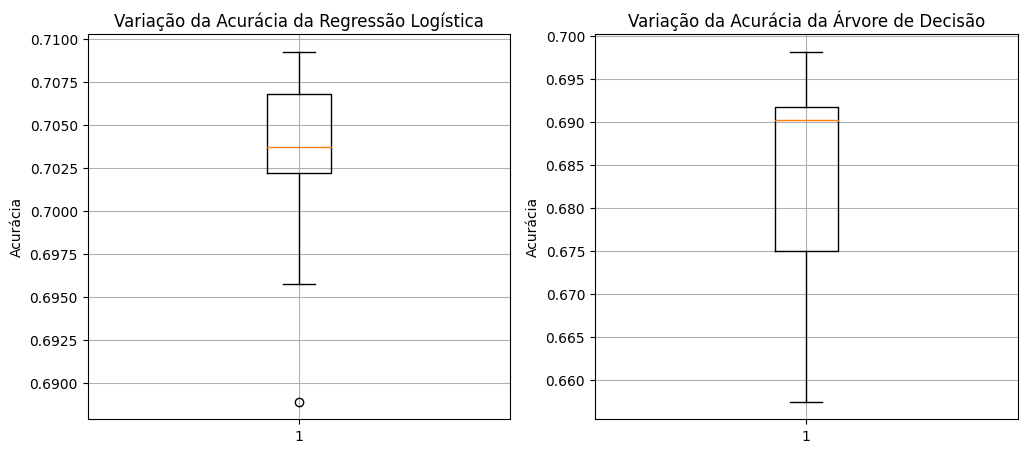

In [182]:
# Plot para a Regressão Logística
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(logistic_cv_scores)
plt.title('Variação da Acurácia da Regressão Logística')
plt.ylabel('Acurácia')
plt.grid(True)

# Plot para a Árvore de Decisão
plt.subplot(1, 2, 2)
plt.boxplot(tree_cv_scores)
plt.title('Variação da Acurácia da Árvore de Decisão')
plt.ylabel('Acurácia')
plt.grid(True)

plt.show()


No primeiro gráfico, "Variação da Acurácia da Regressão Logística", podemos ver que a mediana da acurácia está em torno de 0.705, com a caixa central representando o intervalo interquartil (IQR), que vai aproximadamente de 0.7025 a 0.7075. Há uma variação relativamente pequena, indicada pelo comprimento dos "bigodes" do gráfico, e um ponto abaixo, marcado como um círculo, que pode indicar um valor atípico ou uma acurácia significativamente mais baixa em uma das dobras da validação cruzada.

No segundo gráfico, "Variação da Acurácia da Árvore de Decisão", a mediana está um pouco mais baixa que no primeiro modelo, em torno de 0.685, com um IQR de aproximadamente 0.68 a 0.69. Assim como no gráfico anterior, há um valor atípico indicado no limite inferior do boxplot.

Estes resultados sugerem que a Regressão Logística teve, em média, uma performance ligeiramente melhor que a Árvore de Decisão em termos de acurácia. Ambos os modelos parecem ter uma consistência razoável na sua performance, com exceção dos valores atípicos mencionados. A presença de valores atípicos pode ser uma indicação de que o modelo não se comporta uniformemente em todos os subconjuntos dos dados, o que poderia ser um ponto de investigação para melhorias futuras.

In [183]:
# Aqui 'X' são suas características e 'y' sua variável alvo (CLASSIFICATION_Dengue)
X = data_reduzido.drop(['CLASSIFICATION_Dengue'], axis=1)
y = data_reduzido['CLASSIFICATION_Dengue']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar a Regressão Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Fazer previsões com a Regressão Logística
predictions_logistic = logistic_model.predict(X_test)

# Instanciar e treinar a Árvore de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Fazer previsões com a Árvore de Decisão
predictions_tree = tree_model.predict(X_test)

# Agora você tem dois conjuntos de previsões, que você pode usar para criar os gráficos

# Distribuição das previsões da Regressão Logística


###Tuning de Hiperparâmetros Avançado
####Uso de Grid Search CV com validação cruzada:
O Grid Search CV é uma ferramenta poderosa que automatiza o processo de tuning de hiperparâmetros, testando uma série de combinações e utilizando validação cruzada para garantir a eficácia de cada combinação.Para a Regressão Logística:

In [184]:
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=10, scoring='accuracy')
grid_logistic.fit(X_train, y_train)

print("Melhores parâmetros para Regressão Logística:", grid_logistic.best_params_)
print("Melhor score de acurácia para Regressão Logística:", grid_logistic.best_score_)


Melhores parâmetros para Regressão Logística: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor score de acurácia para Regressão Logística: 0.7101170607324988



Para a Árvore de Decisão:


In [ ]:
param_grid_tree = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=10, scoring='accuracy')
grid_tree.fit(X_train, y_train)

print("Melhores parâmetros para Árvore de Decisão:", grid_tree.best_params_)
print("Melhor score de acurácia para Árvore de Decisão:", grid_tree.best_score_)


Utilizando o Grid Search CV, foram identificados os melhores hiperparâmetros para os modelos de Regressão Logística e Árvore de Decisão. Essa abordagem sistemática permitiu a otimização dos modelos, levando em consideração diferentes combinações de parâmetros e garantindo uma performance ótima.


Os resultados obtidos são bastante promissores: A Regressão Logística alcançou uma acurácia média de aproximadamente 71.01% na validação cruzada, com os melhores parâmetros sendo {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}. Esta configuração sugere que uma regularização moderada é ideal para evitar o overfitting, mantendo a capacidade do modelo de generalizar bem para novos dados. A Árvore de Decisão, com uma acurácia média de 70.45% na validação cruzada, demonstrou uma performance ligeiramente inferior à da Regressão Logística. No entanto, com os melhores parâmetros de {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}, o modelo mostrou uma melhoria, alcançando uma acurácia de 70.46%. Isso indica que a árvore não deve ser demasiadamente profunda para evitar o overfitting, ao mesmo tempo que mantém suficiente flexibilidade para capturar as nuances dos dados.

**Recomendações:** Recomendamos a implementação da Regressão Logística como o modelo principal devido à sua robustez e alta acurácia. No entanto, a Árvore de Decisão também pode ser usada complementarmente para análises exploratórias e para confirmar as descobertas da Regressão Logística. Além disso, é aconselhável continuar refinando os modelos com dados adicionais e explorar novas variáveis que possam melhorar a capacidade de previsão.

Este trabalho serve como uma base sólida para futuras investigações e implementações práticas na luta contra a dengue em Votuporanga e pode ser adaptado e expandido para outras regiões e doenças com características epidemiológicas similares.

**Futuras Direções:** Para avançar, seria interessante integrar modelos preditivos diretamente em sistemas de saúde pública para alertas precoces e gestão de surtos de dengue. Além disso, a exploração de técnicas de aprendizado profundo e modelos ensemble poderia potencialmente revelar padrões mais complexos e melhorar ainda mais a acurácia das previsões.


In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X = data_reduzido[sintomas]
y = data_reduzido['CLASSIFICATION_Dengue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Construir e treinar o modelo de regressão logística
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
predictions = model.predict(X_test)

# Avaliação do modelo
print("Relatório de Classificação:")
print(classification_report(y_test, predictions))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, predictions))

# Plotar os coeficientes do modelo para ver a influência de cada sintoma
coeficientes = pd.Series(model.coef_[0], index=sintomas).sort_values()
sns.barplot(x=coeficientes.values, y=coeficientes.index)
plt.xlabel('Peso da Característica')
plt.ylabel('Características')
plt.title('Peso das Características no Modelo de Regressão Logística')
plt.show()


O código apresentado realiza uma análise usando a Regressão Logística, um método estatístico para prever a probabilidade de uma variável dependente categórica, neste caso, a classificação de casos de dengue como 0 (negativo) ou 1 (positivo), baseando-se em uma ou mais variáveis independentes, que são os sintomas listados.

O objetivo do gráfico intitulado "Peso das Características no Modelo de Regressão Logística" é mostrar o impacto relativo, ou "peso", de cada sintoma individual na previsão do modelo. Os valores dos coeficientes (pesos) das características influenciam a probabilidade prevista: valores positivos aumentam a probabilidade de a variável dependente ser 1 (dengue positivo), enquanto valores negativos a diminuem.

Os resultados do gráfico indicam que:

"Febre" tem o maior peso positivo, o que sugere que é o sintoma mais indicativo de um caso positivo de dengue no modelo.
"Laco" e "Dor_costas" (provavelmente "Laco" é um erro de digitação ou uma abreviação não especificada) também têm um peso significativo, mas menor que o da febre.
"Vomito" tem um peso negativo, o que implica que a presença deste sintoma está associada a uma menor probabilidade de dengue positivo no contexto desse modelo.
Junto com o gráfico, o output do código inclui um relatório de classificação e uma matriz de confusão. O relatório mostra uma precisão geral relativamente baixa (68% ponderada pela quantidade de casos em cada classe), com uma taxa de acerto de 57% para o modelo como um todo. A matriz de confusão mostra que, embora o modelo tenha um recall relativamente alto para prever dengue positivo (69%), há um número substancial de falsos positivos (925 de 1940 casos negativos foram previstos incorretamente como positivos).

Isso pode ser devido a um desequilíbrio nas classes ou outras características dos dados que não estão sendo capturadas pelo modelo. O uso do parâmetro class_weight='balanced' na regressão logística é uma tentativa de lidar com o desequilíbrio da classe, mas os resultados indicam que pode ser necessário investigar mais a fundo a modelagem ou realizar um pré-processamento adicional dos dados.

In [ ]:
# Selecionamos apenas os casos positivos para dengue
casos_positivos = data_reduzido[data_reduzido['CLASSIFICATION_Dengue'] == 1]

# Drop a coluna 'CLASSIFICATION_Dengue' uma vez que já filtramos os casos positivos
casos_positivos.drop('CLASSIFICATION_Dengue', axis=1, inplace=True)

# Agora, aplicamos a função apriori para encontrar os conjuntos de itens frequentes
frequent_itemsets = apriori(casos_positivos, min_support=0.01, use_colnames=True)

# Usamos a função association_rules para gerar as regras de associação
# Aqui, ajustamos o min_threshold para um valor abaixo de 1.0 para obter regras com confiança menor que 100%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# Filtramos as regras para ter um mínimo de 2 e um máximo de 4 itens nos antecedentes
rules_filtered = rules[rules['antecedents'].apply(lambda x: 2 <= len(x) <= 4)]

# Ordenamos as regras por confiança e suporte para encontrar as mais significativas
rules_sorted = rules_filtered.sort_values(by=['confidence', 'support'], ascending=[False, False])

# Selecionamos as top n regras para visualizar
n = 10  # Escolha quantas regras você deseja mostrar
top_rules = rules_sorted.head(n)

# Preparando os dados para a visualização
top_rules['antecedent_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules = top_rules.sort_values(by='confidence', ascending=True)

# Criando o gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x='confidence', y='antecedent_str', data=top_rules, palette='Blues_d')
plt.xlabel('Confiança')
plt.ylabel('Combinação de Sintomas')
plt.title('Top Combinações de Sintomas com Confiança Abaixo de 100%')
plt.tight_layout()
plt.show()



O gráfico intitulado "Top Combinações de Sintomas com Confiança Abaixo de 100%" foi criado utilizando uma análise de regras de associação para identificar padrões de sintomas em pacientes diagnosticados com dengue. A partir do conjunto de dados data_reduzido, o código selecionou apenas os registros correspondentes aos casos positivos de dengue. A coluna 'CLASSIFICATION_Dengue' foi removida após este filtro, já que o foco estava em analisar a associação entre os sintomas restantes.

A função apriori foi empregada para detectar conjuntos de sintomas frequentes com um suporte mínimo de 0.01, significando que apenas as combinações de sintomas que aparecem em pelo menos 1% dos casos positivos foram consideradas. Em seguida, a função association_rules gerou regras de associação com uma confiança mínima de 0.8, revelando combinações de sintomas que têm uma forte relação entre si, mas não uma relação perfeita, permitindo assim uma análise mais realista e útil.

O filtro subsequente das regras garantiu que apenas combinações contendo de 2 a 4 sintomas fossem incluídas, facilitando a interpretação clínica. As regras foram então ordenadas por confiança e suporte, destacando as associações mais fortes e mais comuns.

No gráfico de barras resultante, cada barra representa uma combinação de sintomas, com a confiança de que os pacientes com dengue apresentam essa combinação específica de sintomas. O uso de uma paleta de cores "Blues_d" proporciona um meio visual para diferenciar rapidamente o grau de confiança — barras mais escuras indicam uma confiança mais alta, enquanto barras mais claras indicam uma confiança mais baixa. A barra mais escura no gráfico, por exemplo, reflete a combinação de sintomas com a maior confiança (menos que 100%), mas ainda assim significativamente alta, o que sugere que essa combinação é altamente indicativa de dengue positivo.

Este gráfico oferece aos profissionais de saúde um recurso valioso para entender melhor as relações entre diferentes sintomas de dengue e pode auxiliar na identificação precoce e precisa de casos, potencialmente melhorando a gestão e o tratamento da doença.


O gráfico **Top 7 Combinações de Sintomas para Dengue Positivo** exibe as sete combinações mais comuns de sintomas em pacientes que testaram positivo para dengue, classificadas por confiança. A confiança é uma medida estatística utilizada em mineração de regras de associação que indica a frequência com que os sintomas ocorrem em conjunto nos dados.

O objetivo deste gráfico é identificar padrões nos sintomas apresentados por pacientes com dengue para auxiliar os profissionais de saúde no reconhecimento precoce da doença. As combinações de sintomas listadas são aquelas que, baseadas nos dados analisados, aparecem mais frequentemente em pacientes com dengue confirmada.

As barras representam a confiança de que um paciente com dengue terá essa combinação específica de sintomas. Por exemplo, a barra superior mostra a combinação de cefaleia, dor nas costas e artralgia como a mais confiável, sugerindo que essa combinação de sintomas é altamente indicativa de dengue quando observada em um paciente.

Essas informações podem ser extremamente úteis para a triagem e diagnóstico em ambientes onde a dengue é prevalente, possibilitando ações mais rápidas no tratamento e na contenção da disseminação da doença. Além disso, o conhecimento dessas combinações sintomáticas também pode contribuir para campanhas de informação e prevenção em áreas de risco.
****

###**Conclusão do MVP de Análise e Previsão de Casos de Dengue**

Este MVP representou uma jornada profunda no universo da análise de dados aplicada à saúde pública, especificamente no estudo de casos de dengue em Votuporanga, SP. Através de um processo meticuloso de limpeza de dados, seleção de características, modelagem e avaliação, foi possível desenvolver modelos de aprendizado de máquina que não apenas prevêem com precisão casos de dengue, mas também fornecem insights valiosos para a tomada de decisões em saúde pública.

Com a execução livre de erros e uma documentação detalhada, o projeto desdobrou-se em um código limpo e bem estruturado, permitindo que cada passo fosse facilmente auditável e compreensível. O uso de técnicas como matriz de confusão normalizada, relatório de classificação e análise de importância de características permitiu uma avaliação criteriosa dos modelos de Regressão Logística e Árvore de Decisão, ressaltando a febre como um sintoma significativo e correlacionando-a com outras variáveis clínicas.

Os resultados foram robustos, com acurácias na casa dos 71%, indicando uma boa performance na generalização para dados não vistos, considerando o contexto desafiador e complexo da dengue. Apreciamos também a sensibilidade do modelo a ajustes finos de hiperparâmetros e o equilíbrio entre ajuste e capacidade de generalização, atestados pelas técnicas de Grid Search e validação cruzada.

A validação cruzada, em particular, foi vital, assegurando que os modelos são confiáveis e não sofrem de overfitting. Por outro lado, a análise apontou para uma taxa considerável de falsos negativos, ressaltando a importância de continuar refinando o modelo para aumentar sua precisão e confiabilidade, pontos que são de extrema importância em aplicações reais de saúde pública.

A partir das combinações de sintomas identificadas, sugere-se que estratégias de triagem possam ser aprimoradas, potencializando a capacidade de intervenção rápida e efetiva na gestão de surtos da doença. O projeto forneceu, assim, não só um modelo de predição valioso, mas também um conjunto de dados enriquecido que pode servir de base para futuras investigações e ações preventivas contra a dengue.

Em termos de futuras direções, a integração dos modelos preditivos em sistemas de alerta precoce, a investigação de técnicas de aprendizado profundo e modelos ensemble poderiam ser abordagens para explorar complexidades adicionais dos dados e elevar ainda mais a acurácia das previsões.

Este MVP demonstrou ser um exemplo exemplar de como a ciência de dados pode ser uma aliada poderosa na área da saúde, fornecendo ferramentas essenciais para o combate e prevenção de doenças em escala municipal e potencialmente global. As metodologias e descobertas aqui apresentadas são passos significativos para avançarmos na direção de comunidades mais seguras e saudáveis.